In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

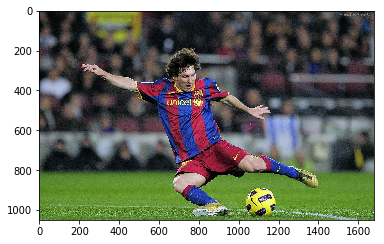

(1050, 1680, 3)

In [2]:
image = np.array(Image.open("roi.jpg"))
plt.imshow(image)
plt.show()
image.shape

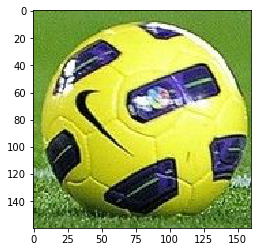

dtype('uint8')

In [3]:
roi = image[880:1040, 1030:1190,:]
plt.imshow(roi)
plt.show()
roi.dtype

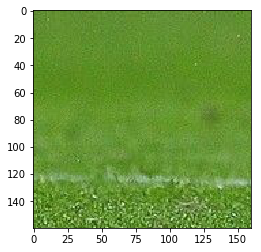

ROI shape =  (160, 160, 3)
Postition shape =  (160, 160, 3)


In [4]:
img = image.copy()
place = img[855:1015, 220:380, :]
plt.imshow(place)
plt.show()
print("ROI shape = ", roi.shape)
print("Postition shape = ", place.shape)

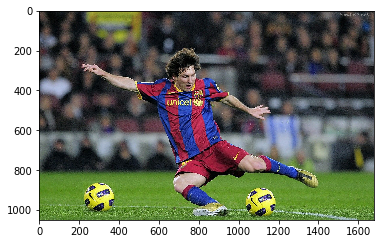

In [5]:
place[:, :, :] = roi[:, :, :]
plt.imshow(img)
plt.show()

## Gaussian Blur

In [6]:
def blur(input_image):
    # Blur kernel
    ## Gaussian kernel
    kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
              [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
              [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
              [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
              [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]
    
    width = input_image.shape[0]
    height = input_image.shape[1]
    channel = input_image.shape[2]
    
    # Middle of the kernel
    offset = len(kernel) // 2

    # Create empty output array
    output_image = np.empty((width,height,channel))

    # Compute convolution between value and kernels
    for x in range(offset, width - offset):
        for y in range(offset, height - offset):
            acc = [0] * channel
            
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = x + a - offset
                    yn = y + b - offset
                    value = input_image[xn][yn]
                    for c in  range(channel):
                        acc[c] += value[c] * kernel[a][b]

            for c in  range(channel):
                output_image[x][y][c] = acc[c]
    return output_image

In [10]:
output = blur(img)
output = Image.fromarray(np.uint8(img)).convert("RGB")
output.save("ROI-output.jpg")